#**Sentiment Analysis on News Publications to Determine Overall Positivity**

####**By: Ayda Nayeb Nazar**

####**1. Introduction**

In this notebook, I will be using a Kaggle [dataset](https://www.kaggle.com/snapcrack/all-the-news) with 143,000 article headlines from 15 American publication companies. I will be running the data through Textblob, a Python library for processing textual data, that comes with some pre-trained sentiment classifiers, to determine news headlines’ sentiment values. We will then be able to see the number of headlines Textblob identified as positive, neutral or negative and visualize these news publication sentiments.


We begin by importing relevant modules:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We then load all needed data:

In [2]:
articles_1 = pd.read_csv("articles1.csv")
articles_1

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
49995,53287,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers..."
49996,53288,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...
49997,53289,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...
49998,53290,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...


In [3]:
articles_2 = pd.read_csv("articles2.csv")
articles_2

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,53293,73471,Patriots Day Is Best When It Digs Past the Her...,Atlantic,David Sims,2017-01-11,2017.0,1.0,NaN,"Patriots Day, Peter Berg’s new thriller that r..."
1,53294,73472,A Break in the Search for the Origin of Comple...,Atlantic,Ed Yong,2017-01-11,2017.0,1.0,NaN,"In Norse mythology, humans and our world were ..."
2,53295,73474,Obama’s Ingenious Mention of Atticus Finch,Atlantic,Spencer Kornhaber,2017-01-11,2017.0,1.0,NaN,“If our democracy is to work in this increasin...
3,53296,73475,"Donald Trump Meets, and Assails, the Press",Atlantic,David A. Graham,2017-01-11,2017.0,1.0,NaN,Updated on January 11 at 5:05 p. m. In his fir...
4,53297,73476,Trump: ’I Think’ Hacking Was Russian,Atlantic,Kaveh Waddell,2017-01-11,2017.0,1.0,NaN,Updated at 12:25 p. m. After months of equivoc...
...,...,...,...,...,...,...,...,...,...,...
49994,103453,151902,"If Baltimore is serious about police reform, g...",Guardian,Lawrence Grandpre,2016-08-12,2016.0,8.0,https://www.theguardian.com/commentisfree/2016...,There have been many proposed solutions to the...
49995,103454,151903,The transition from summer to fall feels like ...,Guardian,Mary Valle,2016-08-28,2016.0,8.0,https://www.theguardian.com/commentisfree/2016...,"Maybe I feel like August won’t let go of me, b..."
49996,103455,151904,"Colombia: Farc’s female fighters, then and now...",Guardian,NaN,2016-09-16,2016.0,9.0,https://www.theguardian.com/artanddesign/2016/...,"Diana Marcela, 28, has spent 13 years with Far..."
49997,103456,151905,Why I’m optimistic about 2017,Guardian,Paul Mason,2016-12-26,2016.0,12.0,https://www.theguardian.com/politics/commentis...,"This Christmas break, for anybody steeped in t..."


In [4]:
articles_3 = pd.read_csv("articles3.csv")
articles_3

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,103459,151908,Alton Sterling’s son: ’Everyone needs to prote...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...
1,103460,151909,Shakespeare’s first four folios sell at auctio...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeare’s first four boo...
2,103461,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
3,103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
4,103463,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...
...,...,...,...,...,...,...,...,...,...,...
42566,146028,218078,An eavesdropping Uber driver saved his 16-year...,Washington Post,Avi Selk,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Uber driver Keith Avila picked up a p...
42567,146029,218079,Plane carrying six people returning from a Cav...,Washington Post,Sarah Larimer,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Crews on Friday continued to search L...
42568,146030,218080,After helping a fraction of homeowners expecte...,Washington Post,Renae Merle,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,When the Obama administration announced a...
42569,146031,218081,"Yes, this is real: Michigan just banned bannin...",Washington Post,Chelsea Harvey,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,This story has been updated. A new law in...


In [5]:
articles_1 = pd.concat([articles_1, articles_2, articles_3], axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)
articles_1

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...,...
42566,146028,218078,An eavesdropping Uber driver saved his 16-year...,Washington Post,Avi Selk,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Uber driver Keith Avila picked up a p...
42567,146029,218079,Plane carrying six people returning from a Cav...,Washington Post,Sarah Larimer,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Crews on Friday continued to search L...
42568,146030,218080,After helping a fraction of homeowners expecte...,Washington Post,Renae Merle,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,When the Obama administration announced a...
42569,146031,218081,"Yes, this is real: Michigan just banned bannin...",Washington Post,Chelsea Harvey,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,This story has been updated. A new law in...


####**2. Exploratory Data Analysis and Cleaning**

Before conducting the sentiment analysis, it is important to get a rough sense of our data. I will be verifying some of its attributes and filtering some of the data.

In [6]:
articles_1.shape

(142570, 10)

In [7]:
articles_1["title"].isnull().value_counts()

False    142568
True          2
Name: title, dtype: int64

Upon some inspection, it seems that the only years with a reasonable amount of data are 2016-2017, so I will filter to these years. I will also remove the two null records in the dataset.



In [8]:
years = ['2016.0','2017.0']
articles_1 = articles_1.loc[articles_1['year'].isin(years)]

In [9]:
articles_1.reset_index(inplace=True)

In [10]:
np.count_nonzero([ty == str for ty in [type(title) for title in np.array(articles_1['title'])]])
articles_1['title type'] = [type(title) for title in np.array(articles_1['title'])]
articles_1 = articles_1[articles_1['title type'] == str]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


####**3. Sentiment Analysis**

Now, we will perform the sentiment analysis using TextBlob and then create some visualizations.

In [11]:
def analize_sentiment_raw(headline):
    analysis = TextBlob(headline)
    return analysis.sentiment.polarity

In [12]:
articles_1['SA'] = np.array([analize_sentiment_raw(headline) for headline in np.array(articles_1['title'])])
articles_1

,index,Unnamed: 0,id,title,publication,author,date,year,month,url,content,title type,SA
0,0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...,<class 'str'>,0.318182
1,1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood...",<class 'str'>,0.136364
2,2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri...",<class 'str'>,0.136364
3,3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t...",<class 'str'>,-0.031818
4,4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ...",<class 'str'>,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135804,42566,146028,218078,An eavesdropping Uber driver saved his 16-year...,Washington Post,Avi Selk,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Uber driver Keith Avila picked up a p...,<class 'str'>,0.000000
135805,42567,146029,218079,Plane carrying six people returning from a Cav...,Washington Post,Sarah Larimer,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,Crews on Friday continued to search L...,<class 'str'>,-0.400000
135806,42568,146030,218080,After helping a fraction of homeowners expecte...,Washington Post,Renae Merle,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,When the Obama administration announced a...,<class 'str'>,-0.050000
135807,42569,146031,218081,"Yes, this is real: Michigan just banned bannin...",Washington Post,Chelsea Harvey,2016-12-30,2016.0,12.0,https://web.archive.org/web/20161231004909/htt...,This story has been updated. A new law in...,<class 'str'>,0.200000


In [13]:
articles_1_clean = articles_1[['SA', 'publication']]
articles_1_clean2 = articles_1_clean.groupby(['publication']).mean().reset_index()
articles_1_clean2 = articles_1_clean2.sort_values(['SA'],ascending=False).head(15)
articles_1_clean2

,publication,SA
10,New York Times,0.111343
2,Business Insider,0.060214
13,Vox,0.051213
7,NPR,0.043666
12,Talking Points Memo,0.035578
6,Guardian,0.032476
3,Buzzfeed News,0.028023
0,Atlantic,0.026798
14,Washington Post,0.022752
11,Reuters,0.020008


In [14]:
articles_1_clean['positive'] = np.where(articles_1['SA'] > 0, 1, 0)
articles_1_clean['neutral'] = np.where(articles_1['SA'] == 0, 1, 0)
articles_1_clean['negative'] = np.where(articles_1['SA'] < 0, 1, 0)
articles_1_clean4 = articles_1_clean[['publication','positive','neutral','negative']] #change to clean 4?
articles_1_clean3 = articles_1_clean4.groupby(['publication']).sum().reset_index() #change to clean 4?
articles_1_clean3.sort_values(['positive'],ascending=False).head(15)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,publication,positive,neutral,negative
10,New York Times,6824,0,975
1,Breitbart,5469,13536,4701
9,New York Post,4677,9196,3573
7,NPR,3451,6359,2010
14,Washington Post,3175,5555,2348
2,Business Insider,2585,2852,1320
11,Reuters,2423,6599,1664
6,Guardian,2366,4558,1700
13,Vox,1730,2134,1014
4,CNN,1591,5056,1279


Below I also calculate the proportion of positive, neutral, and negative headlines.

In [15]:
articles_1_clean3['positive_perc'] = \
articles_1_clean3['positive']/(articles_1_clean3['positive'] + articles_1_clean3['neutral'] + articles_1_clean3['negative'])
articles_1_clean3['neutral_perc'] = \
articles_1_clean3['neutral']/(articles_1_clean3['positive'] + articles_1_clean3['neutral'] + articles_1_clean3['negative'])
articles_1_clean3['negative_perc'] = \
articles_1_clean3['negative']/(articles_1_clean3['positive'] + articles_1_clean3['neutral'] + articles_1_clean3['negative'])
articles_1_clean3.sort_values(['positive_perc'], ascending=False).head(15)

,publication,positive,neutral,negative,positive_perc,neutral_perc,negative_perc
10,New York Times,6824,0,975,0.874984,0.000000,0.125016
2,Business Insider,2585,2852,1320,0.382566,0.422081,0.195353
13,Vox,1730,2134,1014,0.354654,0.437474,0.207872
7,NPR,3451,6359,2010,0.291963,0.537986,0.170051
14,Washington Post,3175,5555,2348,0.286604,0.501444,0.211952
3,Buzzfeed News,1354,2549,951,0.278945,0.525134,0.195921
6,Guardian,2366,4558,1700,0.274351,0.528525,0.197124
9,New York Post,4677,9196,3573,0.268084,0.527112,0.204803
12,Talking Points Memo,670,1498,393,0.261617,0.584928,0.153456
1,Breitbart,5469,13536,4701,0.230701,0.570995,0.198304


Based on our analysis, it seems that the New York Times has the largest proportion of positive headlines, followed by Business Insider on average. The bar plot below helps visualize this.

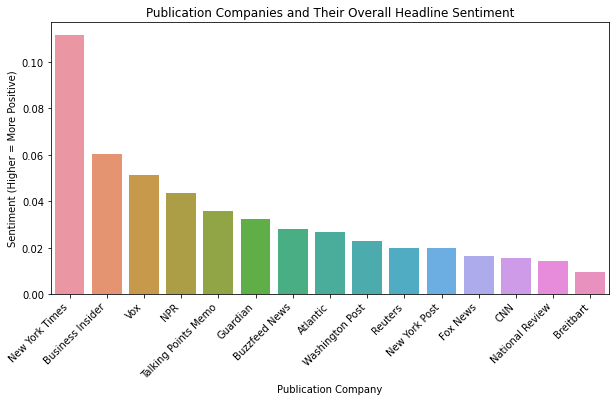

In [26]:
plt.figure(figsize=(10,5))
chart = sns.barplot(articles_1_clean2['publication'], articles_1_clean2['SA'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel('Sentiment (Higher = More Positive)')
plt.xlabel('Publication Company')
plt.title('Publication Companies and Their Overall Headline Sentiment');

####**4. Problems and Next Steps**

*   EDA visualization was difficult due to our mainly textual data
*   Unsure of Textblob’s accuracy in classification of positive/negative headline sentiment, or what the pre-trained sentiment classifiers are
*   In the future, I’d be interested in applying this analysis to Twitter data which is more unstructured and would give more unique insight into individuals’ rhetoric, such as prominent political figures
*   Because I am uncertain as to how Textblob works, I’d like to train my own model next time to get more accurate results

